In [51]:
# prelude
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("assets/km_traveled_all_transportations.csv").iloc[:,1:]
df.head()


,type_of_transport,Km_traveled
0,uber,34
1,bike,30
2,uber,22
3,bike,17
4,bike,29


### Ci-dessus : 
* Bien voir les titres des colonnes
* Les lignes et que les type se répettent (bike, uber ...)

In [53]:
df.groupby("type_of_transport").mean()

,Km_traveled
type_of_transport,
bike,23.125
bus,59.625
car,49.875
uber,40.375


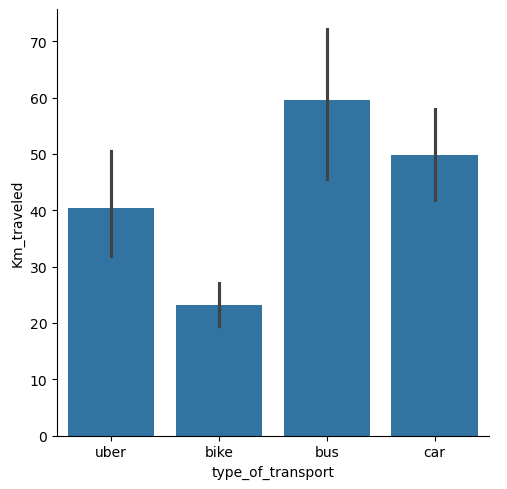

In [54]:
# catplot
# Allows to draw ALL the categorical plots with one parameter called "kind" 
# You can use kind = bar, swarm , box, violin , count , point , etc. 

# ci default = 95%
_ = sns.catplot(df, x="type_of_transport", y="Km_traveled", kind="bar")               # ! voir le _ = ... en début de ligne

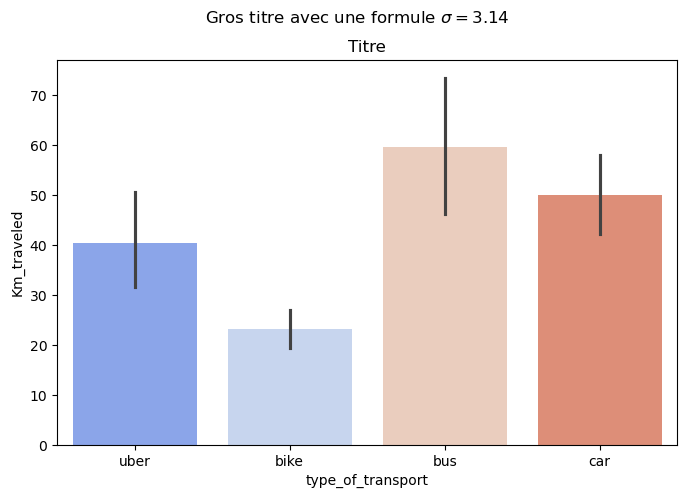

In [55]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot (df, x="type_of_transport", y="Km_traveled", palette="coolwarm", hue="type_of_transport")              
fig.suptitle("Gros titre avec une formule $\sigma = 3.14$")
ax.set_title("Titre");                                         # ! voir le ; en fin de ligne


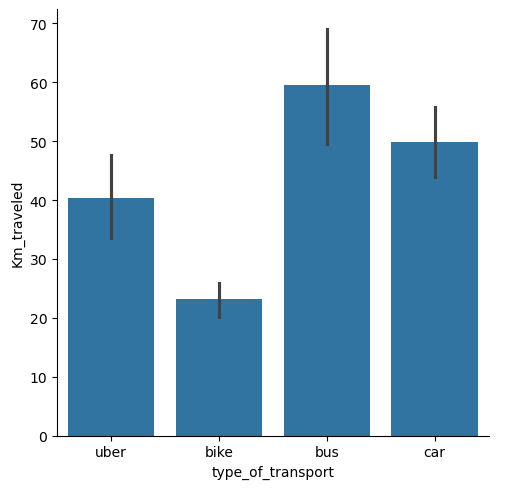

In [56]:
# confidence level  85% au lieu de 95 par défaut
_ = sns.catplot(df, x="type_of_transport", y="Km_traveled", kind="bar", errorbar=('ci', 85))

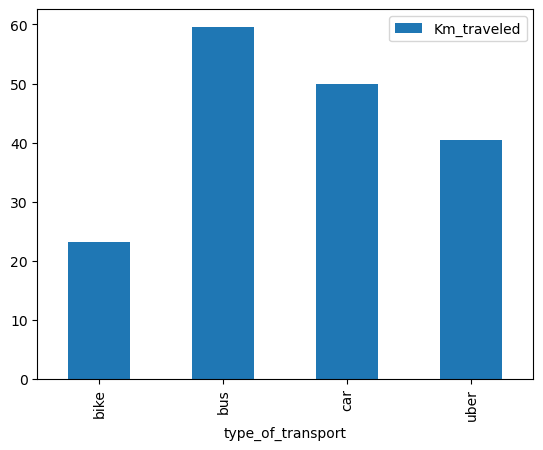

In [57]:
_ = df.groupby("type_of_transport").mean().plot(kind="bar")         # voir que c'est la fonction plot() de l'objet df qu'on utilise


# Confidence intervals with category in columns

In [58]:
df = pd.read_csv("assets/km_traveled_per_transport.csv").iloc[:,1:]
df.head()

,bike,bus,car,uber
0,21,75,55,22
1,30,87,34,34
2,17,49,38,38
3,30,68,66,66
4,24,75,56,56


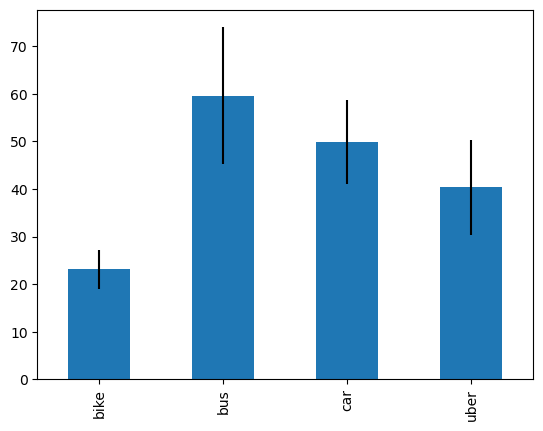

In [59]:
# confidence level 90%
t_value = 1.96
sigma = df.std()
n = len(df)
E = t_value * sigma / np.sqrt(n)

# df.groupby("type_of_transport").mean().plot(yerr=E, kind="bar") # ! fonctionne pas car y a pas de colonne type_of_transport
_ = df.mean().plot(yerr=E, kind="bar")